In [33]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [34]:
# filename = '/home/mark/installs/gpmp2/mark_gpmp2/usdf_comparison/2dresults.csv'
filename = '/home/mark/installs/gpmp2/mark_gpmp2/usdf_comparison/2dresults_lambda0_001.csv'

In [35]:
df = pd.read_csv(filename,
                 header=None,
                 names=['Config', 'Environment', 'ObsArea', 'dt',
                        'USDF_Cost', 'USDF_NumCollisions', 'USDF_Iterations',
                       'SDF_Cost', 'SDF_NumCollisions', 'SDF_Iterations'])

# Check whether trajectory is collision-free
df['SDF_CollisionFree'] = (df['SDF_NumCollisions']==0).astype(int)
df['USDF_CollisionFree'] = (df['USDF_NumCollisions']==0).astype(int)

In [36]:
df['SDF_lower_cost'] = (df['SDF_Cost']<df['USDF_Cost']).astype(int)
df['SDF_fewer_iterations'] = (df['SDF_Iterations']<df['USDF_Iterations']).astype(int)
df['SDF_fewer_collision'] = (df['SDF_NumCollisions']<df['USDF_NumCollisions']).astype(int)

df['USDF_lower_cost'] = (df['SDF_Cost']>df['USDF_Cost']).astype(int)
df['USDF_fewer_iterations'] = (df['SDF_Iterations']>df['USDF_Iterations']).astype(int)
df['USDF_fewer_collision'] = (df['SDF_NumCollisions']>df['USDF_NumCollisions']).astype(int)

# pre_filter_means = merged_df.mean()
# print pre_filter_means['USDF_CollisionFree']
# print pre_filter_means['SDF_CollisionFree']

In [37]:
merged_df_no_filter = df


In [38]:
df.shape[0]

76500

In [39]:
print df['SDF_CollisionFree'].sum()
print df['USDF_CollisionFree'].sum()

print df['SDF_CollisionFree'].sum().astype(float)/df.shape[0]
print df['USDF_CollisionFree'].sum().astype(float)/df.shape[0]

8105
7880
0.10594771241830066
0.10300653594771242


In [40]:
# Remove experiments where neither solved for collision free
initial_num = df.shape[0]
col_free_inds = (df['SDF_CollisionFree'] == 1) | (df['USDF_CollisionFree'] == 1)
col_inds = (df['SDF_CollisionFree'] == 0) & (df['USDF_CollisionFree'] == 0)
retained_num = sum(col_free_inds)
rejected_num = initial_num - retained_num

print "Rejecting " + str(rejected_num)

rejected_df = df[col_inds]
df = df[col_free_inds]


sdf_df = df[df['SDF_CollisionFree'] == 1]
usdf_df = df[df['USDF_CollisionFree'] == 1]


Rejecting 68382


In [41]:
rejected_df[]

SyntaxError: invalid syntax (<ipython-input-41-8da929a4e5c6>, line 1)

In [42]:
print df['SDF_CollisionFree'].sum().astype(float)/df.shape[0]
print df['USDF_CollisionFree'].sum().astype(float)/df.shape[0]

0.9983986203498398
0.9706824340970682


In [43]:
df[['USDF_Cost', 'SDF_Cost']].mean()

USDF_Cost    781.444655
SDF_Cost      68.906055
dtype: float64

# Iterations

In [44]:
print merged_df_no_filter['USDF_Iterations'].min()
print merged_df_no_filter['SDF_Iterations'].min()

1
1


In [45]:
print merged_df_no_filter['USDF_Iterations'].mean()
print merged_df_no_filter['USDF_Iterations'].std()


print merged_df_no_filter['SDF_Iterations'].mean()
print merged_df_no_filter['SDF_Iterations'].std()

7.56964705882353
5.904918508769195
8.240366013071895
6.661529909001957


In [57]:
7.56964705882353/8.240366013071895

0.9186056841183525

In [46]:
sdf_max_iters_df = merged_df_no_filter[merged_df_no_filter['SDF_Iterations'] == 100]
usdf_max_iters_df = merged_df_no_filter[merged_df_no_filter['USDF_Iterations'] == 100]

print sdf_max_iters_df.shape[0]
print usdf_max_iters_df.shape[0]

7
1


In [47]:
sdf_min_iters_df = merged_df_no_filter[merged_df_no_filter['SDF_Iterations'] == 1]
usdf_min_iters_df = merged_df_no_filter[merged_df_no_filter['USDF_Iterations'] == 1]

print sdf_min_iters_df.shape[0]
print usdf_min_iters_df.shape[0]

189
77


In [48]:
merged_df_no_filter.shape[0]

76500

In [49]:
2000/76500.0

0.026143790849673203

In [50]:
sdf_max_iters_df.shape[0]

7

In [51]:
usdf_max_iters_df.shape[0]

1

In [52]:
merged_df_no_filter[['USDF_Iterations', 'SDF_Iterations']]

,USDF_Iterations,SDF_Iterations
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,32,13
9,5,5


# Collision Free

In [53]:
print 100 * (df.shape[0] - df['USDF_CollisionFree'].sum()).astype(float)/df.shape[0]
print 100 * (df.shape[0] - df['SDF_CollisionFree'].sum()).astype(float)/df.shape[0]
# print merged_df['USDF_CollisionFree'].sum().astype(float)/merged_df.shape[0]

2.9317565902931757
0.1601379650160138


In [55]:
2.93/0.16

18.3125

# Cost

In [54]:
print df[df['USDF_CollisionFree'] == 1]['USDF_Cost'].mean()
print df[df['USDF_CollisionFree'] == 1]['USDF_Cost'].std()

print df[df['SDF_CollisionFree'] == 1]['SDF_Cost'].mean()
print df[df['SDF_CollisionFree'] == 1]['SDF_Cost'].std()

68.56072100675676
504.76877358122147
61.50429316485362
378.8992874638019


In [56]:
68.56072100675676/61.50429316485362

1.1147306550290625

In [29]:
df[df['USDF_CollisionFree'] == 1]['USDF_Cost'].mean()

630.9680033623819

In [9]:
df.groupby('dt')['USDF_Cost', 'SDF_Cost'].mean()

,USDF_Cost,SDF_Cost
dt,,
0.1,1396.678074,922.911984
0.2,1523.322049,553.400736
0.3,1457.713046,688.985366
0.4,1503.301970,672.405573
0.5,1400.954642,688.094473


In [10]:
df.groupby('dt')['USDF_CollisionFree', 'SDF_CollisionFree'].sum()

,USDF_CollisionFree,SDF_CollisionFree
dt,,
0.1,5047,6034
0.2,6033,6134
0.3,6062,6177
0.4,6042,6195
0.5,6029,6208


In [11]:
env_sum = df.groupby('Environment')['USDF_CollisionFree', 'SDF_CollisionFree'].sum()
env_sum[(env_sum['SDF_CollisionFree'] > env_sum['USDF_CollisionFree'])]

,USDF_CollisionFree,SDF_CollisionFree
Environment,,
1,319,330
2,378,390
3,378,390
4,378,390
5,70,75
6,99,105
7,378,390
8,265,275
9,319,330


In [12]:
df[(df['SDF_CollisionFree'] > df['USDF_CollisionFree'])]

,Config,Environment,ObsArea,dt,USDF_Cost,USDF_NumCollisions,USDF_Iterations,SDF_Cost,SDF_NumCollisions,SDF_Iterations,SDF_CollisionFree,USDF_CollisionFree,SDF_lower_cost,SDF_fewer_iterations,SDF_fewer_collision,USDF_lower_cost,USDF_fewer_iterations,USDF_fewer_collision
182,2,83,1.434692,0.1,19120.248338,2,17,361.782750,0,44,1,0,1,0,1,0,1,0
500,6,1,5.922349,0.1,7009.176262,1,7,5752.612299,0,17,1,0,1,0,1,0,1,0
501,6,2,1.459401,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
502,6,3,0.840770,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
503,6,4,3.128544,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
504,6,5,5.322841,0.1,7022.833182,1,14,5760.184394,0,26,1,0,1,0,1,0,1,0
505,6,6,5.831858,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
506,6,7,1.103470,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
507,6,8,4.203470,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0
508,6,9,5.650977,0.1,7009.176262,1,7,5752.621742,0,19,1,0,1,0,1,0,1,0


In [13]:
df[(df['SDF_CollisionFree'] < df['USDF_CollisionFree'])]

,Config,Environment,ObsArea,dt,USDF_Cost,USDF_NumCollisions,USDF_Iterations,SDF_Cost,SDF_NumCollisions,SDF_Iterations,SDF_CollisionFree,USDF_CollisionFree,SDF_lower_cost,SDF_fewer_iterations,SDF_fewer_collision,USDF_lower_cost,USDF_fewer_iterations,USDF_fewer_collision
115,2,16,0.374490,0.1,3345.141252,0,15,2527.268185,1,19,0,1,1,0,0,0,1,1
881,9,82,0.635996,0.1,5895.492627,0,18,6671.893311,1,2,0,1,0,1,0,1,0,1
1025,11,26,0.972582,0.1,10.344953,0,60,4073.152120,1,14,0,1,0,1,0,1,0,1
4385,44,86,0.467914,0.1,89.383738,0,31,6684.317218,1,11,0,1,0,1,0,1,0,1
4715,48,16,0.374490,0.1,3301.047518,0,14,2438.474869,1,100,0,1,1,0,0,0,1,1
4725,48,26,0.972582,0.1,5058.644044,0,17,3947.758102,1,77,0,1,1,0,0,0,1,1
5415,55,16,0.374490,0.1,3305.604928,0,43,2445.694089,1,90,0,1,1,0,0,0,1,1
5869,59,70,0.139196,0.1,3371.422182,0,16,2688.654204,1,17,0,1,1,0,0,0,1,1
5969,60,70,0.139196,0.1,215.154073,0,51,2881.679919,1,22,0,1,0,1,0,1,0,1
6115,62,16,0.374490,0.1,3352.625466,0,54,2480.031665,1,79,0,1,1,0,0,0,1,1


In [14]:
print df['SDF_Iterations'].mean().astype(float)
print df['USDF_Iterations'].mean().astype(float)

4.770022734654108
4.029457616109126


In [15]:
print df['SDF_Cost'].mean().astype(float)
print df['USDF_Cost'].mean().astype(float)

704.3840623494272
1456.5400346909441


# Box plot

<IPython.core.display.Javascript object>


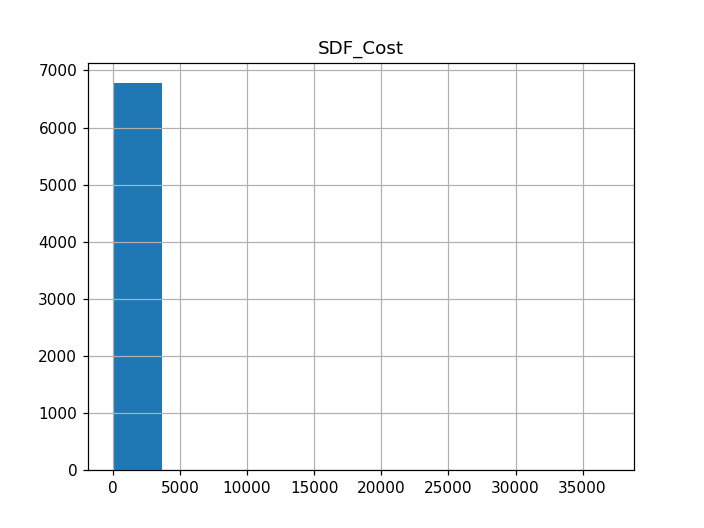

In [14]:
boxplot = sdf_df.hist(column=['SDF_Cost'])


<IPython.core.display.Javascript object>


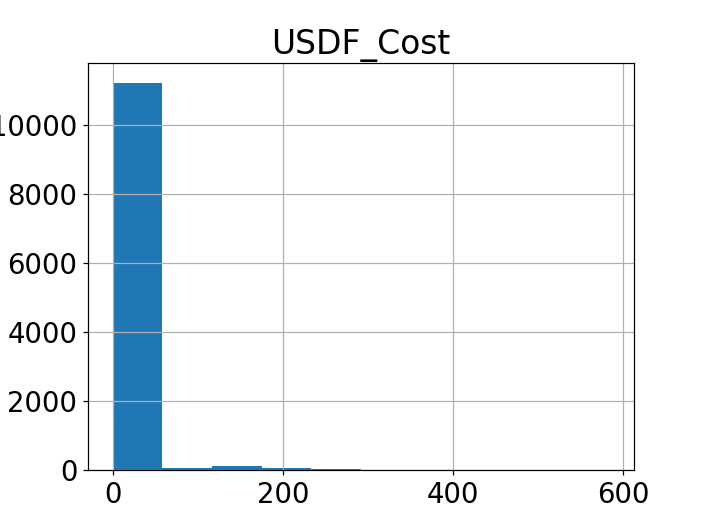

In [114]:
boxplot = usdf_df.hist(column=['USDF_Cost'])


In [15]:
print sdf_df['SDF_Iterations'].max()
print sdf_df['SDF_Iterations'].quantile([0.25,0.5,0.75])
print sdf_df['SDF_Iterations'].mean()
print sdf_df['SDF_Iterations'].min()
print sdf_df['SDF_Iterations'].std()

73
0.25    3.0
0.50    4.0
0.75    7.0
Name: SDF_Iterations, dtype: float64
7.3600647439670395
1
7.528019004732671


In [16]:
# boxplot = sdf_df.boxplot(column=['SDF_Cost'])
print usdf_df['USDF_Iterations'].max()
print usdf_df['USDF_Iterations'].quantile([0.25,0.5,0.75])
print usdf_df['USDF_Iterations'].mean()
print usdf_df['USDF_Iterations'].min()
print usdf_df['USDF_Iterations'].std()

54
0.25    3.0
0.50    4.0
0.75    7.0
Name: USDF_Iterations, dtype: float64
7.197259870359458
1
7.306653922802424


# Cost

In [17]:
# boxplot = sdf_df.boxplot(column=['SDF_Cost'])
print sdf_df['SDF_Cost'].max()
print sdf_df['SDF_Cost'].quantile([0.25,0.5,0.75])
print sdf_df['SDF_Cost'].mean()
print sdf_df['SDF_Cost'].min()

print sdf_df['SDF_Cost'].std()

36949.9097123822
0.25     5.122277
0.50    14.810288
0.75    56.161613
Name: SDF_Cost, dtype: float64
62.872819923134834
0.8548248568014158
729.6139519686012


In [18]:
# boxplot = sdf_df.boxplot(column=['SDF_Cost'])
print usdf_df['USDF_Cost'].max()
print usdf_df['USDF_Cost'].quantile([0.25,0.5,0.75])
print usdf_df['USDF_Cost'].mean()
print usdf_df['USDF_Cost'].min()

print usdf_df['USDF_Cost'].std()

13089.755701190501
0.25     5.122277
0.50    14.672526
0.75    55.822730
Name: USDF_Cost, dtype: float64
43.06984230614372
0.8548248568014158
235.59624601139785


In [43]:
rejected_df.min()

SDF_Cost                 29.044019
SDF_NumCollisions         1.000000
SDF_Iterations            2.000000
SDF_CollisionFree         0.000000
USDF_Cost                29.044019
USDF_NumCollisions        1.000000
USDF_Iterations           2.000000
USDF_CollisionFree        0.000000
SDF_lower_cost            0.000000
SDF_fewer_iterations      0.000000
SDF_fewer_collision       0.000000
USDF_lower_cost           0.000000
USDF_fewer_iterations     0.000000
USDF_fewer_collision      0.000000
dtype: float64

In [45]:
rejected_df.max()

SDF_Cost                 45387.531053
SDF_NumCollisions           51.000000
SDF_Iterations             100.000000
SDF_CollisionFree            0.000000
USDF_Cost                43744.240590
USDF_NumCollisions          51.000000
USDF_Iterations            100.000000
USDF_CollisionFree           0.000000
SDF_lower_cost               1.000000
SDF_fewer_iterations         1.000000
SDF_fewer_collision          1.000000
USDF_lower_cost              1.000000
USDF_fewer_iterations        1.000000
USDF_fewer_collision         1.000000
dtype: float64

In [47]:
rejected_df.median()

SDF_Cost                 503.484622
SDF_NumCollisions          3.000000
SDF_Iterations            20.000000
SDF_CollisionFree          0.000000
USDF_Cost                514.242689
USDF_NumCollisions         3.000000
USDF_Iterations           19.000000
USDF_CollisionFree         0.000000
SDF_lower_cost             1.000000
SDF_fewer_iterations       0.000000
SDF_fewer_collision        0.000000
USDF_lower_cost            0.000000
USDF_fewer_iterations      0.000000
USDF_fewer_collision       0.000000
dtype: float64

In [8]:
# import numpy as np 
# np.where(merged_df['USDF_fewer_collision'])
# merged_df[merged_df.index == merged_df.index[557]]

In [9]:
print "Num experiments: " + str(initial_num)
print "Num rejected: " + str(rejected_num)
print "Num retained: " + str(retained_num)

Num experiments: 15300
Num rejected: 3823
Num retained: 11477


In [10]:
filtered_sum = merged_df.sum()

same_num_collisions = retained_num - (filtered_sum['SDF_fewer_collision'] + filtered_sum['USDF_fewer_collision'])
same_num_iterations = retained_num - (filtered_sum['SDF_fewer_iterations'] + filtered_sum['USDF_fewer_iterations'])
same_num_cost = retained_num - (filtered_sum['SDF_lower_cost'] + filtered_sum['USDF_lower_cost'])


filtered_mean = merged_df.mean()


In [11]:
filtered_sum

SDF_Cost                 77145.303079
SDF_NumCollisions           17.000000
SDF_Iterations           61829.000000
SDF_CollisionFree        11470.000000
USDF_Cost                76384.822715
USDF_NumCollisions           8.000000
USDF_Iterations          61524.000000
USDF_CollisionFree       11472.000000
SDF_lower_cost             358.000000
SDF_fewer_iterations       323.000000
SDF_fewer_collision          5.000000
USDF_lower_cost            341.000000
USDF_fewer_iterations      327.000000
USDF_fewer_collision         7.000000
dtype: float64

# Visuals

In [12]:
sum_table_data = [['Fewer Collisions', filtered_sum['USDF_fewer_collision'], same_num_collisions, filtered_sum['SDF_fewer_collision']], # Num fewer collisions
 ['Fewer Iterations', filtered_sum['USDF_fewer_iterations'], same_num_iterations, filtered_sum['SDF_fewer_iterations']],# Num fewer iterations
 ['Lower Cost', filtered_sum['USDF_lower_cost'], same_num_cost, filtered_sum['SDF_lower_cost']]# Num fewer iterations
] 

mean_table_data = [['Mean Collisions', filtered_mean['USDF_NumCollisions'], filtered_mean['SDF_NumCollisions']], # Num fewer collisions
 ['Mean Iterations', filtered_mean['USDF_Iterations'], filtered_mean['SDF_Iterations']],# Num fewer iterations
 ['Mean Cost', filtered_mean['USDF_Cost'], filtered_mean['SDF_Cost']]# Num fewer iterations
] 


In [13]:
res_df = pd.DataFrame(sum_table_data, columns=['Metric', 'USDF', 'Tie', 'SDF'])
res_df['SDF'] = res_df['SDF'].astype(int)
res_df['Tie'] = res_df['Tie'].astype(int)
res_df['USDF'] = res_df['USDF'].astype(int)

print res_df.to_string(index=False)


           Metric  USDF    Tie  SDF
 Fewer Collisions     7  11465    5
 Fewer Iterations   327  10827  323
       Lower Cost   341  10778  358


In [14]:
res_df = pd.DataFrame(mean_table_data, columns=['Metric', 'USDF', 'SDF'])

print res_df.to_string(index=False)


          Metric      USDF       SDF
 Mean Collisions  0.000697  0.001481
 Mean Iterations  5.360634  5.387209
       Mean Cost  6.655469  6.721731


<IPython.core.display.Javascript object>


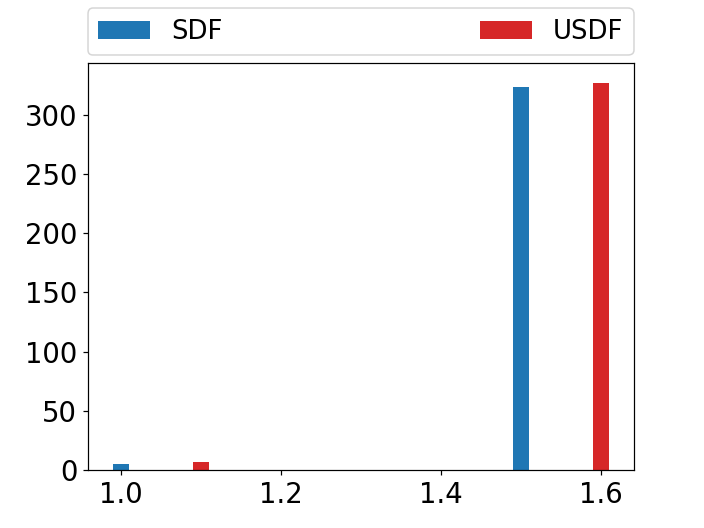

In [15]:
# Set figure params

font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

# plt.figure(1);
# fig, ax = plt.subplots(figsize=(8, 6), dpi=300,)    
fig, ax = plt.subplots()    
plt.bar(1, filtered_sum['SDF_fewer_collision']
, width=0.02, color='tab:blue', align='center', label='SDF')
plt.bar(1.1, filtered_sum['USDF_fewer_collision']
, width=0.02, color='tab:red', align='center', label='USDF')

plt.bar(1.5, filtered_sum['SDF_fewer_iterations']
, width=0.02, color='tab:blue', align='center')
plt.bar(1.6, filtered_sum['USDF_fewer_iterations']
, width=0.02, color='tab:red', align='center')

plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
# leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0., fontsize=17, handletextpad=-0.6)

leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=17)

# for handle in leg.legendHandles:
#     handle.set_width(15.0)
# plt.ylim([0,550])
# plt.xlim([0.95,2.05])
# plt.savefig('.png', dpi=300)
plt.show()